<a href="https://colab.research.google.com/github/dickyadem/MSIB-2-Orbit-Foundation-of-AI/blob/main/Deep_Learning_Enigma_DickyAde.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Dicky Ade Mahendra <br>
Kelas :  Enigma<br>
Asal Universitas :  Universitas Gundarma

# RB & KM 3-2

## A. Membangun Model dengan Sequential API

In [ ]:
# Import Keras
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Contoh 1:
# Memiliki 1 input layer dengan 8 neuron (menerima 8 input)
# Memiliki 1 hidden layer dengan 10 neuron
# Memiliki 1 output layer dengan 1 neuron

model11 = Sequential()
model11.add(Dense(10, input_shape=(8,)))
model11.add(Dense(1))

model11.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                90        
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Contoh 1 (2):

model12 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(8,)),
    tf.keras.layers.Dense(1)
])

model12.summary()

model122 = Sequential([
    Dense(10, input_shape=(8,)),
    Dense(1)
 ])
model122.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                90        
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                90        
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 101
Trainable params

In [ ]:
# Contoh 2:
# Memiliki 1 input layer dengan 10 neuron (menerima 10 input)
# Memiliki 5 hidden layer
# Memiliki 1 output layer dengan 1 neuron

model2 = Sequential()
model2.add(Dense(100, input_shape=(10,))) # h1
model2.add(Dense(80)) # h2
model2.add(Dense(30)) # h3
model2.add(Dense(10)) # h4
model2.add(Dense(5)) # h5
model2.add(Dense(1))

model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               1100      
                                                                 
 dense_7 (Dense)             (None, 80)                8080      
                                                                 
 dense_8 (Dense)             (None, 30)                2430      
                                                                 
 dense_9 (Dense)             (None, 10)                310       
                                                                 
 dense_10 (Dense)            (None, 5)                 55        
                                                                 
 dense_11 (Dense)            (None, 1)                 6         
                                                                 
Total params: 11,981
Trainable params: 11,981
Non-trai

## B. Membangun Model dengan Functional API

In [ ]:
from tensorflow.keras import Input
from tensorflow.keras import Model

In [ ]:
# Contoh 3:
# Memiliki 1 input layer dengan 8 neuron (menerima 8 input)
# Memiliki 2 hidden layer
# Memiliki 1 output layer dengan 1 neuron

in_layer = Input(shape=(8,))
hid_layer1 = Dense(10)(in_layer)
hid_layer2 = Dense(5)(hid_layer1)
out_layer = Dense(1)(hid_layer2)

# Define Model
model3 = Model(inputs=in_layer, outputs=out_layer)
model3.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense_12 (Dense)            (None, 10)                90        
                                                                 
 dense_13 (Dense)            (None, 5)                 55        
                                                                 
 dense_14 (Dense)            (None, 1)                 6         
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


# Build Deep Learning Model

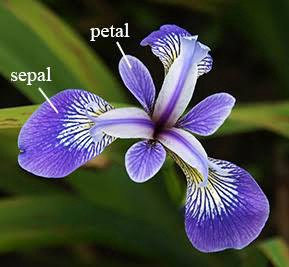

In [ ]:
from pandas import read_csv
from numpy import argmax # array get max (get posisi nilai terbesar dalam array)
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import os

## 1. Gathering Data

In [ ]:
f = open('/content/diabetes_dataset.csv')
df = read_csv(f)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 2. Preparing Data

### A. Pisahkan dataset menjadi feature (X) dan label (y)

In [ ]:
X = df[['Pregnancies','Glucose',	'BloodPressure',	'SkinThickness',	'Insulin',	'BMI'	,'DiabetesPedigreeFunction',	'Age']].values
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [ ]:
y = df['Outcome'].values

In [ ]:
from sklearn.preprocessing import LabelEncoder # encode label nilai kategorik menjadi nilai numerik

y = LabelEncoder().fit_transform(y) # encode label menjadi nilai numerik
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

### B. Split Data menjadi training dan testing dataset



In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# memperoleh banyaknya jumlah fitur pada input
n_features = X_train.shape[1]
print(n_features)

(614, 8) (154, 8) (614,) (154,)
8


## 3. Deep Learning Model Life-Cycle (DLMLC)

### A. Define the Model

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
n_features = X_train.shape[1]

model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(n_features,)))
model.add(Dense(24, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 10)                90        
                                                                 
 dense_22 (Dense)            (None, 24)                264       
                                                                 
 dense_23 (Dense)            (None, 24)                600       
                                                                 
 dense_24 (Dense)            (None, 24)                600       
                                                                 
 dense_25 (Dense)            (None, 24)                600       
                                                                 
 dense_26 (Dense)            (None, 24)                600       
                                                                 
 dense_27 (Dense)            (None, 3)                

### B. Compile the Model

In [ ]:
model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

### C. Fit the Model

In [ ]:
model.fit(
    X_train,
    y_train,
    batch_size = 32,
    epochs = 200,
    verbose=1
)

Epoch 1/200
20/20 [==============================] - 0s 4ms/step - loss: 0.3695 - accuracy: 0.8306
Epoch 2/200
20/20 [==============================] - 0s 4ms/step - loss: 0.3530 - accuracy: 0.8420
Epoch 3/200
20/20 [==============================] - 0s 6ms/step - loss: 0.3522 - accuracy: 0.8404
Epoch 4/200
20/20 [==============================] - 0s 9ms/step - loss: 0.3483 - accuracy: 0.8388
Epoch 5/200
20/20 [==============================] - 0s 5ms/step - loss: 0.3638 - accuracy: 0.8274
Epoch 6/200
20/20 [==============================] - 0s 5ms/step - loss: 0.3834 - accuracy: 0.8111
Epoch 7/200
20/20 [==============================] - 0s 3ms/step - loss: 0.3769 - accuracy: 0.8257
Epoch 8/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3504 - accuracy: 0.8274
Epoch 9/200
20/20 [==============================] - 0s 3ms/step - loss: 0.3480 - accuracy: 0.8290
Epoch 10/200
20/20 [==============================] - 0s 4ms/step - loss: 0.3432 - accuracy: 0.8388
Epoch 11/